In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [61]:
class AdalineGD(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, verbose = False):
        self.eta = eta
        self.n_iter = n_iter
        self.verbose =verbose
    
    def fit(self, X, y):
        """Fit Training Data"""
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            
            errors = (y - output)
            
            self.w_[1:] += self.eta * X.T.dot(errors)
            
            self.w_[0] += self.eta * errors.sum()
            
            cost = (errors**2).sum() / 2.0
            
            self.cost_.append(cost)
            
            if self.verbose:
                print(output)
                print(str(y) + ' - ' +str(output) + '=' + str(errors) + '(errors)' + str(errors.shape))
                print('X.T.dot(errors) = ' + str(X.T)+'(' +str(X.T.shape) + ')*' + str(errors) )
                print(str(self.eta) + ' * ' + str(X.T.dot(errors))+'=' + str(self.w_[1:]) + '(weights)')
                print(str(self.eta) + ' * ' + str(errors.sum()) + '=' + str(self.w_[0]) + '(weight 0)')
                print(str((errors ** 2).sum())+'/2 = '+str(cost) )
                print('self.cost_ = ' + str(self.cost_))
        return self
    
    def net_input(self, X):
        if self.verbose:
            print(str(X) +' * ' + str(self.w_[1:])+ ' + ' + str(self.w_[0]) + '=')
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute Linear Activation"""
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0, 1, -1)
    
        

In [62]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
y = df.iloc[0:100, 4].values
y = np.where(y==1.0, -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [63]:
adal = AdalineGD(n_iter = 10, eta = 0.01, verbose = True).fit(X, y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

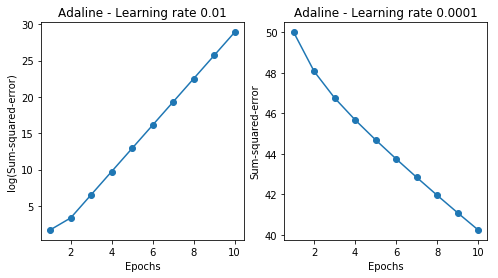

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(8 , 4))
ax[0].plot(range(1, len(adal.cost_)+ 1), 
          np.log10(adal.cost_), marker = 'o')
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
            ada2.cost_, marker='o') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [65]:
def plot_decision_regions(X, y, classifier, resolution = 0.02):
     # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max =X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max =X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha = 0.8, c = cmap(idx), marker = markers[idx],
                   label = cl)

In [66]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:,1] = (X[:,1] - X[:, 1].mean()) / X[:, 1].std()

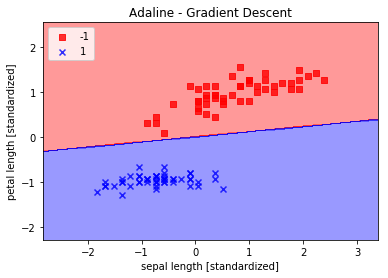

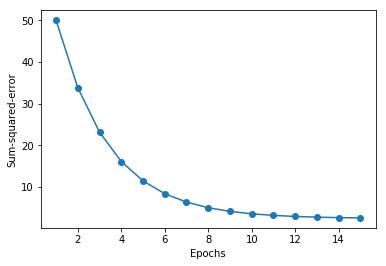

In [67]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()